In [1]:
import pandas as pd
import pandas_datareader as pdr # IF NECESSARY, from terminal: pip install pandas_datareader 
import datetime as dt
import datadotworld as dw # follow instructions for installing and using dw in accompanying lecture
import numpy as np

/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## My turn: What were the most popular male and female names in each year? 


In [2]:
# get the data
baby_names = dw.load_dataset('nkrishnaswami/us-ssa-baby-names-national')
baby_names = baby_names.dataframes['names_ranks_counts']

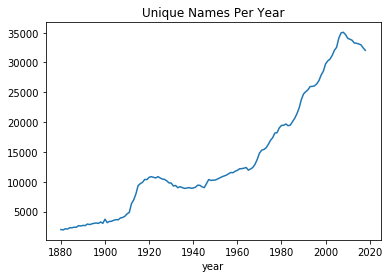

In [3]:
# a silly observation
(baby_names.pivot_table(index='year',values='name',aggfunc='count') # count unique names per year
    .plot.line(title='Unique Names Per Year',legend=False) # plot it, uses panda
) 


In [4]:
(baby_names.sort_values(['year','sex','count'],ascending=False) # sort descending so most popular name first
     .groupby(['year','sex']) # group by year and gender 
     .agg(lambda x: x.iloc[0]) # keep the first (most popular) name each year
     ['name'] # keep only the name variable
     .unstack() # format wide
     [-20:]
)

sex,F,M
year,,
1999,Emily,Jacob
2000,Emily,Jacob
2001,Emily,Jacob
2002,Emily,Jacob
2003,Emily,Jacob
2004,Emily,Jacob
2005,Emily,Jacob
2006,Emily,Jacob
2007,Emily,Jacob


### A side lesson: What on earth is **`lambda`**? 

Can you survive without learning `lambda`? Yes. 

But knowing `lambda` will make you a more powerful programmer, because it lets you define functions very quickly. And this is very useful! For example, the `agg` function can apply any function, not just built-in ones, and sometimes you'll want to use non built-in functions!

So, generally, the syntax is `<fcn_name> = lambda <argument> : <function>`.

In [5]:
my_fcn = lambda a : a*5 # if I call my_fcn(7), python will set a=7, then evalute the function a*5
print(my_fcn(7))

35


Now, in the example above inside `agg()` I never named the function. That's because it's unnecessary in that context, python knows to immediately call it.

### Maybe you say "I hate that and will never ever write a lambda. How can I accomplish the problem above anyways?"

Well, I'm sorry to hear that! Here is what you could do:

In [6]:
def return_first_element(df):
    return df.iloc[0]

(baby_names.sort_values(['year','sex','count'],ascending=False) # sort descending so most popular name first
     .groupby(['year','sex']) # group by year and gender 
     .agg(return_first_element) # keep the first (most popular) name each year
     ['name'] # keep only the name variable
     .unstack() # format wide
     [-20:]
)

sex,F,M
year,,
1999,Emily,Jacob
2000,Emily,Jacob
2001,Emily,Jacob
2002,Emily,Jacob
2003,Emily,Jacob
2004,Emily,Jacob
2005,Emily,Jacob
2006,Emily,Jacob
2007,Emily,Jacob


# My turn: Can we use the last letter of a name to predict the sex of the baby?

Text(0, 0.5, '<-----Femine letters                         Masculine letters----->')

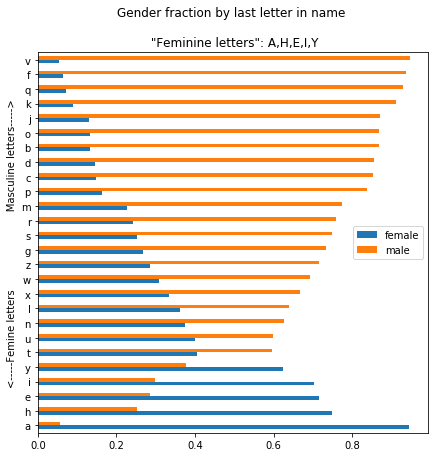

In [7]:
(baby_names.query('year >= 1970') # let's focus on the last 50 years, maybe old-timey people had different naming rules
           .assign(last_letter = baby_names['name'].str[-1]) # get the last letter of each name string
           .assign(male = baby_names['sex'] == 'M') # = 1 if male, 0 else
           .assign(female= baby_names['sex'] == 'F') # = 1 if female, 0 else
           .pivot_table(index='last_letter',values=['male','female']) # average of male & female variables --> % of each
           .sort_values('male') # so the figure is in order
           .plot.barh(figsize=(7,7), # make it a bit bigger 
           title = 'Gender fraction by last letter in name \n \n "Feminine letters": A,H,E,I,Y')
           .set_ylabel("<-----Femine letters                         Masculine letters----->")
)

# Your turn: Practice 

Try each one alone, then check and compare with the person next to you.

There are many ways to solve each, so if your approaches differ, explain it to each other!

## Example 1

In [9]:
start = datetime.datetime(2010, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2013, 1, 27)
macro_df = pdr.data.DataReader(['GDP','CPIAUCSL'], 'fred', start, end)

- Q0: Do each of the four new golden rules for initial data exploration, from the lecture.
- Q1: What is the second series above?
- Q2: What is the frequency of the series?
- Q3: What is the average ANNUAL GDP, based on the data?

In [11]:
# do your work here

#Q0
macro_df.describe()

,GDP,CPIAUCSL
count,13.000000,37.000000
mean,15653.550385,224.397351
std,589.174983,5.101731
min,14721.350000,217.199000
25%,15240.843000,219.035000
50%,15591.850000,225.395000
75%,16152.257000,228.590000
max,16569.591000,231.679000


##### Q1
Consumer Price index for all urban consumers
##### Q2
37
##### Q3
15653

## Example 2

- Q4: Download the annual *real* gdp from 1960 to 2018 from FRED and compute the average annual percent change
- Q5: Compute the average gdp percent change within *each decade*


#### Q4

In [50]:
start = datetime.datetime(1960, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2018, 1, 1)
macro_df = pdr.data.DataReader(['GDP'], 'fred', start, end).reset_index()

macro_df.groupby(macro_df.DATE.dt.year)['GDP'].mean().pct_change()

DATE
1960         NaN
1961    0.036556
1962    0.074193
1963    0.055520
1964    0.073747
1965    0.084488
1966    0.095816
1967    0.057219
1968    0.093831
1969    0.081825
1970    0.054731
1971    0.085287
1972    0.098092
1973    0.114348
1974    0.084095
1975    0.090382
1976    0.111880
1977    0.111248
1978    0.129585
1979    0.117251
1980    0.087535
1981    0.122399
1982    0.042640
1983    0.086802
1984    0.111055
1985    0.074640
1986    0.055463
1987    0.060176
1988    0.078518
1989    0.077370
1990    0.056999
1991    0.032698
1992    0.058816
1993    0.051873
1994    0.062503
1995    0.048374
1996    0.056726
1997    0.062483
1998    0.056574
1999    0.062657
2000    0.064553
2001    0.032137
2002    0.033510
2003    0.047715
2004    0.065934
2005    0.067376
2006    0.059676
2007    0.046129
2008    0.018059
2009   -0.017938
2010    0.037589
2011    0.036721
2012    0.042105
2013    0.036293
2014    0.044231
2015    0.039796
2016    0.026901
2017    0.042981
2018    0

#### Q5

In [49]:
start = datetime.datetime(1960, 1, 1) # you can specify start and end dates this way
end = datetime.datetime(2018, 1, 1)
macro_df = pdr.data.DataReader(['GDP'], 'fred', start, end).reset_index()

macro_df.groupby(macro_df.DATE.dt.year // 10 * 10)['GDP'].mean().pct_change()

DATE
1960         NaN
1970    1.310394
1980    1.439454
1990    0.815680
2000    0.661677
2010    0.372281
Name: GDP, dtype: float64

## Example 3

First, I'll load January data on unemployment, the Case-Shiller housing index, and median household income in three states (CA/MI/PA). 

In [51]:
# LOAD DATA AND CONVERT TO ANNUAL

start = 1990 # pandas datareader can infer these are years
end = 2018
macro_data = pdr.data.DataReader(['CAUR','MIUR','PAUR', # unemployment 
                                  'LXXRSA','DEXRSA','WDXRSA', # case shiller index in LA, Detroit, DC (no PA  available!)
                                  'MEHOINUSCAA672N','MEHOINUSMIA672N','MEHOINUSPAA672N'], #  
                                 'fred', start, end)
macro_data = macro_data.resample('Y').first() # get's the first observation for each variable in a given year

# CLEAN UP THE FORMATING SOMEWHAT

macro_data.index = macro_data.index.year
print("\n\n DATA BEFORE FORMATTING: \n\n")
print(macro_data[:20]) # see how the data looks now? ugly variable names, but its an annual dataset at least
macro_data.columns=pd.MultiIndex.from_tuples([
    ('Unemployment','CA'),('Unemployment','MI'),('Unemployment','PA'),
    ('HouseIdx','CA'),('HouseIdx','MI'),('HouseIdx','PA'),
    ('MedIncome','CA'),('MedIncome','MI'),('MedIncome','PA')
    ])
print("\n\n DATA AFTER FORMATTING: \n\n")
print(macro_data[:20]) # this is a dataset that is "wide", and now 
                       # the column variable names have 2 levels - var name, 
                       # and unit/state that variable applies to




 DATA BEFORE FORMATTING: 


      CAUR  MIUR  PAUR      LXXRSA      DEXRSA      WDXRSA  MEHOINUSCAA672N  \
DATE                                                                          
1990   5.2   7.8   5.1  100.471193         NaN   93.362855          62206.0   
1991   7.1   8.8   6.6   95.569015   58.420806   89.706871          60697.0   
1992   8.5   9.4   7.5   92.786926   59.748947   88.573807          61404.0   
1993   9.7   7.6   7.3   85.246295   61.564205   89.065118          58470.0   
1994   9.2   7.1   6.6   77.395052   64.526663   88.988467          59388.0   
1995   7.7   5.2   5.8   76.376389   68.973289   89.670303          60745.0   
1996   7.7   4.9   5.9   73.919989   73.582339   88.655369          62052.0   
1997   6.8   4.7   5.3   74.536884   79.347642   88.775224          62120.0   
1998   6.0   4.0   4.7   81.035037   85.183613   90.108149          63204.0   
1999   5.6   3.9   4.5   92.140086   92.433567   94.188054          65961.0   
2000   5.0   3.3   4.1

- Q6: for each decade and state, report the average annual CHANGE (level, not percent) in unemployment
- Q7: for each decade and state, report the average annual PERCENT CHANGE in house prices and household income

In [67]:
# do your work here
macro_data.MultiIndex.names

#macro_data.groupby(level=1)['Unemployment'].diff()


AttributeError: 'DataFrame' object has no attribute 'MultiIndex'